### Naive Bayes

Naive Bayes is a probabilistic classifier based on `Bayes’ Theorem `.

It assumes that features are independent (hence `naive`) and uses probabilities to predict the most likely class.

#### Bayes’ Theorem

For a class C and features X:
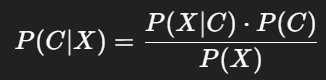

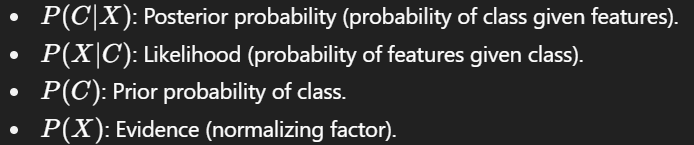

#### Why "Naive"?

Because it assumes all features are independent given the class:

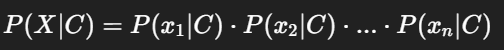

#### Types of Naive Bayes

- Gaussian Naive Bayes → For continuous features, assumes they follow a normal (Gaussian) distribution.
- Multinomial Naive Bayes → For discrete counts (e.g., word counts in text classification).
- Bernoulli Naive Bayes → For binary features (e.g., word present or not in spam filter).